# Assignment 1 & Assignment 2 Question 1

MIT2018020 Aadithya

Assignment 1

2.We are given a housing price dataset. Using various parameters in the datasets we need to predict the housing price.

    1. Predict housing price using normal equations method.
    2. Predict housing price using gradient descent method.
    3. Compare the results for both approaches.

Assignment 2

1.Use housing price dataset. Using various parameters in the datasets we need to predict the housing price.
    1. Predict housing price using normal equations with regularizer.
    2. Predict housing price using gradient descent with regulariser.
    3. Compare the results for both approaches.

    Design alpha and lambda parameters so that hypothesis will perform better.
    Case 1:Use all dataset for training.
    Case 2:70% to design hypothesis and 30% to test hypothesis

    Find the differences and conclude analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing Price data set.csv")
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
df.dtypes

Unnamed: 0      int64
price         float64
lotsize         int64
bedrooms        int64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object

# Removing Catogorical features

In [5]:
data = df.loc[:, ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
price = df.loc[:, ['price']]

In [6]:
data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,5850,3,1,2,1
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


# Normalising

In [7]:
mean = data.mean()
std  = data.std()
normalized_data = (data - mean) / std

In [8]:
std

lotsize     2168.158725
bedrooms       0.737388
bathrms        0.502158
stories        0.868203
garagepl       0.861307
dtype: float64

In [9]:
mean

lotsize     5150.265568
bedrooms       2.965201
bathrms        1.285714
stories        1.807692
garagepl       0.692308
dtype: float64

In [10]:
normalized_data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [11]:
normalized_data['bias'] = np.ones(normalized_data.shape[0])
x = normalized_data.loc[:,['bias', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]

In [30]:
x.head()

,bias,lotsize,bedrooms,bathrms,stories,garagepl
0,1.0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,1.0,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,1.0,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,1.0,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,1.0,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [13]:
def cost(x, y, w, lamb):
    m = len(y)
    return (np.sum((np.dot(x, w) - y) ** 2) + lamb * np.matmul(w.T,w)[0][0])/ (2 * m)    

In [14]:
alpha = 0.001
iterations = 10000
y = price
lamb = 500

In [15]:
def gradient_descend(x, y, alpha, lamb, iterations):
    m = len(y)
    cost_list = []
    w = np.zeros((6,1))

    for i in range(iterations):
        w1 = np.array(w, copy=True)
        w1[0,0] = 0
        grade = (np.dot(x.T,(np.dot(x,w) - y)) + lamb * w1) / m

        w = w - alpha * grade
        cost_list.append(cost(x, y, w, lamb))
        
    return cost_list, w
    

In [16]:
def rms_error(x, y, w):
    h = np.dot(x, w)
    e = np.dot((h - y).T,(h - y)) / len(y)
    return np.sqrt(e[0][0])

def avg_per_error(x, y, w):
    e = np.abs(np.dot(1/y.T,np.abs(np.dot(x, w) - y)))
    return ((e)[0][0] * 100) / len(y)

In [17]:
def normal_eq(x,y,lamb):
    X = np.array(x)
    eye = np.eye(X.shape[1])
    eye[0,0] = 0
    return np.matmul(np.linalg.inv(np.matmul(X.T,X) + lamb * eye), np.matmul(X.T,y))    

In [18]:
w = normal_eq(x,y,5)
print("Normal equation\nLambda = 5\nWeight Matrix")
print(w)
print('\n\n',rms_error(x,y,w),'\n',avg_per_error(x,y,w))

Normal equation
Lambda = 5
Weight Matrix
[[68121.5970696 ]
 [10180.92166978]
 [ 1800.13130095]
 [ 8054.89090815]
 [ 6787.46493298]
 [ 4619.95056808]]


 17669.945040212497 
 20.693984561166975


In [19]:
w = normal_eq(x,y,50)
print("Normal equation\nLambda = 50\nWeight Matrix")
print(w)
print('\n\n',rms_error(x,y,w),'\n',avg_per_error(x,y,w))

Normal equation
Lambda = 50
Weight Matrix
[[68121.5970696 ]
 [ 9509.2944365 ]
 [ 2081.09424174]
 [ 7609.63564453]
 [ 6355.89000123]
 [ 4541.65189742]]


 17705.17660058834 
 20.804810215531578


In [20]:
w = normal_eq(x,y,500)
print("Normal equation\nLambda = 500\nWeight Matrix")
print(w)

print('\n\n',rms_error(x,y,w),'\n',avg_per_error(x,y,w))

Normal equation
Lambda = 500
Weight Matrix
[[68121.5970696 ]
 [ 5924.5024702 ]
 [ 2509.39122415]
 [ 5083.90182309]
 [ 4134.68053841]
 [ 3499.55878031]]


 19025.58539541043 
 23.111549222958622


alpha = 0.01 
lambda = 5      
No of iterations = 1400
Weight
[[68121.54427892]
 [10180.68282169]
 [ 1801.09056678]
 [ 8054.57662314]
 [ 6786.81616919]
 [ 4620.08726839]]
Percentage Error: 20.694041495732595%


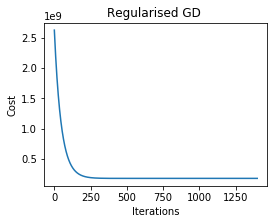

In [21]:
cost_list, w = gradient_descend(x, y, alpha=0.01, lamb=5, iterations=1400)
plt.figure(figsize=(4,3))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Regularised GD ")
print("alpha = {} \nlambda = {}\
      \nNo of iterations = {}\nWeight".format(0.01, 5,1400))
print(w)


p = avg_per_error(x,y,w)
print("Percentage Error: "+str(p)+"%")

alpha = 0.1 
lambda = 5      
No of iterations = 140
Weight
[[68121.57032499]
 [10180.74550733]
 [ 1800.8928887 ]
 [ 8054.64427152]
 [ 6786.94642289]
 [ 4620.0448891 ]]
Percentage Error: 20.694033627952123%


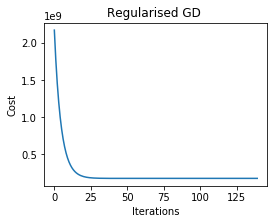

In [22]:
cost_list, w = gradient_descend(x, y, alpha=0.1, lamb=5, iterations=140)
plt.figure(figsize=(4,3))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Regularised GD ")
print("alpha = {} \nlambda = {}\
      \nNo of iterations = {}\nWeight".format(0.1, 5,140))
print(w)

p = avg_per_error(x,y,w)
print("Percentage Error: "+str(p)+"%")

alpha = 0.01 
lambda = 50      
No of iterations = 1250
Weight
[[68121.35868507]
 [ 9509.08539473]
 [ 2081.82181062]
 [ 7609.39136792]
 [ 6355.40505609]
 [ 4541.78490268]]
Percentage Error: 20.804812228996056%


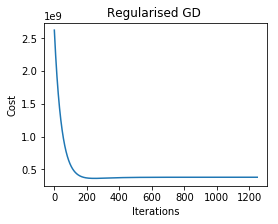

In [23]:
cost_list, w = gradient_descend(x, y, alpha=0.01, lamb=50, iterations=1250)
plt.figure(figsize=(4,3))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Regularised GD ")
print("alpha = {} \nlambda = {}\
      \nNo of iterations = {}\nWeight".format(0.01, 50,1250))
print(w)


p = avg_per_error(x,y,w)
print("Percentage Error: "+str(p)+"%")

alpha = 0.1 
lambda = 50      
No of iterations = 125
Weight
[[68121.46717278]
 [ 9509.14590025]
 [ 2081.64981782]
 [ 7609.45135899]
 [ 6355.516903  ]
 [ 4541.74189986]]
Percentage Error: 20.804831717286994%


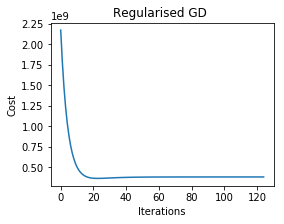

In [24]:
cost_list, w = gradient_descend(x, y, alpha=0.1, lamb=50, iterations=125)
plt.figure(figsize=(4,3))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Regularised GD ")
print("alpha = {} \nlambda = {}\
      \nNo of iterations = {}\nWeight".format(0.1, 50,125))
print(w)


p = avg_per_error(x,y,w)
print("Percentage Error: "+str(p)+"%")

alpha = 0.01 
lambda = 500      
No of iterations = 1200
Weight
[[47616.08154036]
 [ 5521.64418099]
 [ 2670.02216119]
 [ 4844.96190263]
 [ 3921.39613278]
 [ 3441.80776798]]
Percentage Error: 28.78620058570091%


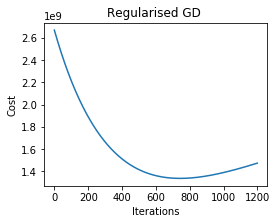

In [25]:
cost_list, w = gradient_descend(x, y, alpha=0.001, lamb=500, iterations=1200)
plt.figure(figsize=(4,3))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Regularised GD ")
print("alpha = {} \nlambda = {}\
      \nNo of iterations = {}\nWeight".format(0.01, 500,1200))
print(w)

p = avg_per_error(x,y,w)
print("Percentage Error: "+str(p)+"%")

alpha = 0.1 
lambda = 500      
No of iterations = 120
Weight
[[68121.3770882 ]
 [ 5924.50246877]
 [ 2509.39122949]
 [ 5083.90182132]
 [ 4134.68053483]
 [ 3499.55878118]]
Percentage Error: 23.111412027905768%


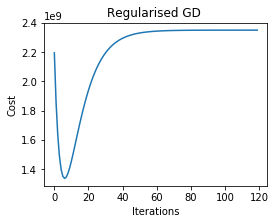

In [26]:
cost_list, w = gradient_descend(x, y, alpha=0.1, lamb=500, iterations=120)
plt.figure(figsize=(4,3))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Regularised GD ")
print("alpha = {} \nlambda = {}\
      \nNo of iterations = {}\nWeight".format(0.1, 500,120))
print(w)

p = avg_per_error(x,y,w)
print("Percentage Error: "+str(p)+"%")

In [27]:
normal_eq(x,y,500)

array([[68121.5970696 ],
       [ 5924.5024702 ],
       [ 2509.39122415],
       [ 5083.90182309],
       [ 4134.68053841],
       [ 3499.55878031]])

### Split the data to train & test (70 - 30 split)

In [28]:
d = int(y.shape[0] * 0.7)

xtrain = x[:d]
xtest = x[d:]
ytrain = y[:d]
ytest = y[d:]

In [29]:
for lamb in [5,50,500]:
    for a in [0.1,0.01]:
        cost_list, w = gradient_descend(xtrain, ytrain, alpha=a, lamb=lamb, iterations=1400)        
        print("alpha = {} \nlambda = {}\
              \nNo of iterations = {}\nWeight".format(a, lamb,1400))
        p = avg_per_error(xtest,ytest,w)
        print("Percentage Error: "+str(p)+"%")
        print(w)
        print('\n\n')

alpha = 0.1 
lambda = 5              
No of iterations = 1400
Weight
Percentage Error: 16.856108014081983%
[[66954.15139819]
 [11118.97453782]
 [ 1461.7836887 ]
 [ 7708.61921823]
 [ 7012.12144157]
 [ 5226.8081968 ]]



alpha = 0.01 
lambda = 5              
No of iterations = 1400
Weight
Percentage Error: 16.854097543024082%
[[66948.29308629]
 [11113.3940267 ]
 [ 1476.44710858]
 [ 7710.70061841]
 [ 6989.06310189]
 [ 5227.49603794]]



alpha = 0.1 
lambda = 50              
No of iterations = 1400
Weight
Percentage Error: 16.538940835618234%
[[66652.46411744]
 [ 9959.84875001]
 [ 1992.43618065]
 [ 7248.26049551]
 [ 6053.31757321]
 [ 5093.50030294]]



alpha = 0.01 
lambda = 50              
No of iterations = 1400
Weight
Percentage Error: 16.539756526334866%
[[66650.60772699]
 [ 9958.25508283]
 [ 1995.65818941]
 [ 7248.83031353]
 [ 6048.15954863]
 [ 5093.7920346 ]]



alpha = 0.1 
lambda = 500              
No of iterations = 1400
Weight
Percentage Error: 17.157806909634886%
[[65421.781

# Without Normalisation

In [40]:
x = data.loc[:,['bias', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
x['bias'] = 1
x.head()

,bias,lotsize,bedrooms,bathrms,stories,garagepl
0,1,5850,3,1,2,1
1,1,4000,2,1,1,0
2,1,3060,3,1,1,0
3,1,6650,3,1,2,0
4,1,6360,2,1,1,0


alpha = 0.1
No of iterations = 25
Weight
[[4.62215313e+159]
 [2.80164643e+163]
 [1.39230982e+160]
 [6.13181925e+159]
 [8.49653072e+159]
 [3.79026750e+159]]
Percentage Error: 2.2365330237218494e+164%


/home/aadithya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


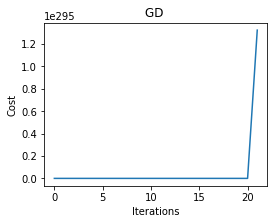

In [46]:
cost_list, w = gradient_descend(x, y, alpha=0.1, lamb=0, iterations=25)
plt.figure(figsize=(4,3))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD ")
print("alpha = {}\nNo of iterations = {}\nWeight".format(0.1,25))
print(w)

p = avg_per_error(x,y,w)
print("Percentage Error: "+str(p)+"%")

In [47]:
print(normal_eq(x,y,0))

[[-2.06364013e+03]
 [ 4.73343521e+00]
 [ 2.38848765e+03]
 [ 1.61480605e+04]
 [ 7.87944111e+03]
 [ 5.37195329e+03]]
